In [1415]:
import numpy as np
import scipy.fftpack as sp

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib inline

import aotools

In [1416]:
def ft2(g,delta):
   
    return sp.fftshift( sp.fft2( sp.fftshift(g) ) ) * delta**2

In [1417]:
def ift2(G,delta_f):
    
    N = G.shape[0]
    
    return sp.ifftshift( sp.ifft2( sp.ifftshift(G) ) ) * (N * delta_f)**2

In [1418]:
def sg_absorber(nx,ny,sig,n=16):
    
    rn = np.sqrt(nx**2 + ny**2)
    
    return np.exp(-(rn/sig)**n)

In [1419]:
"""
Rectangular function
"""

def rect(x,a):
    
    y = np.zeros_like(x)
    
    for i, xn in enumerate(x):
        
        if (abs(xn) < a / 2.0):
            
            y[i] = 1.0
            
        if (abs(xn) == a / 2.0):
            
            y[i] = 0.5
            
        if (abs(xn) > a / 2.0):
            
            y[i] = 0.0
            
    return y
        

In [1420]:
def gen_3d_contour(xn, yn, I):
    
    #%matplotlib qt
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_zlabel(r'$I(x,y)$')

    ax.set_zlim(np.amin(I), np.amax(I))

    surf = ax.plot_surface(xn, yn, I, cmap=cm.viridis,linewidth=0, antialiased=False)
    #cset = ax.contour(xn, yn, I, zdir = 'x', offset =-0.04, cmap = cm.viridis)
    #cset = ax.contour(xn, yn, I, zdir = 'y', offset =0.04, cmap = cm.viridis)

    fig.colorbar(surf, shrink=0.5, aspect=5)
    
    return

In [1421]:
def ang_spec_multi_prop_vac(Uin, wvl, delta1, deltan, z):
    
    N = len(Uin)    
    nx,ny = np.meshgrid(np.arange(-N/2, N/2), np.arange(-N/2, N/2))
    
    k = 2*np.pi / wvl
    
    sig = 0.47*N
    sg = sg_absorber(nx,ny,sig)
    
    z = np.linspace(0,z)
    n = int(len(z))
    Delta_z = np.diff(z)
    
    alpha = z / Delta_z
    
    delta = (1 - alpha) * delta1 + alpha * deltan
    
    m = delta[1:] / delta[0:-1]
    
    x1 = nx * delta[0]
    y1 = ny * delta[0]
    
    r1sq = x1**2 + y1**2
    
    Q1 =  np.exp(1j * k/2 * (1-m[0])/z * r1sq)
    
    Uin = Uin * Q1
    
    for idx in range(0,n-1):
        
        deltaf = 1 / (N * delta[idx])
        fx = nx * deltaf
        fy = ny * deltaf
        
        fsq = fx**2 + fy**2
        
        Z = Delta_z[dix]
        
        Q2 = np.exp(-1j*np.pi**2*2*z/m[idx]/k*fsq)
        
        Uin = sq *np.ifft2(np.fft(Uin / m[idx]))
    
    
    return xn, yn, Uout

In [1422]:
D1 = 2.0e-3 #diameter of the source aperture [m]
D2 = 6.0e-3 #diameter of the observation aperture [m]
wvl = 1e-6 #optical wavelength [m]
k = 2*np.pi / wvl #optical wavenumber [rad/m]
z = 1.0 #propagation distance [m]
delta1 = D1 / 30
deltan = D2 / 30
N = 128 #dfft power of 2  efficiency etc
n = 5
R = 'inf'

# switch from total distance to individual distances
z = np.arange(1,n+1)*z/n

print(z)
print(delta1,deltan)

x1 = delta1*np.arange(-N/2,N/2)
y1 = delta1*np.arange(-N/2,N/2)

apx,apy = np.meshgrid(rect(x1,D1),rect(y1,D1))
ap = apx*apy

[0.2 0.4 0.6 0.8 1. ]
6.666666666666667e-05 0.0002


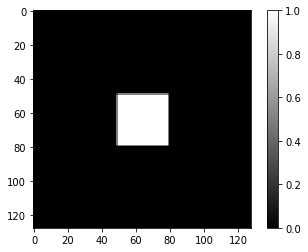

In [1423]:
Uin = ap
plt.figure()
plt.imshow(np.real(Uin),cmap='gray')
plt.colorbar()

In [1424]:
N = Uin.shape[0]    
nx,ny = np.meshgrid(np.arange(-N/2, N/2), np.arange(-N/2, N/2))

k = 2*np.pi / wvl

sig = 0.47*N
sg = sg_absorber(nx,ny,sig)

z = np.insert(z,0,0)
n = int(z.shape[0])
delta_z = np.diff(z)

print(z,delta_z,n)

[0.  0.2 0.4 0.6 0.8 1. ] [0.2 0.2 0.2 0.2 0.2] 6


[0.2 0.2 0.2 0.2 0.2]
[6.66666667e-05 9.33333333e-05 1.20000000e-04 1.46666667e-04
 1.73333333e-04 2.00000000e-04]
[1.4        1.28571429 1.22222222 1.18181818 1.15384615]
delta,delta_z,m
6.666666666666667e-05 0.2 1.4000000000000001


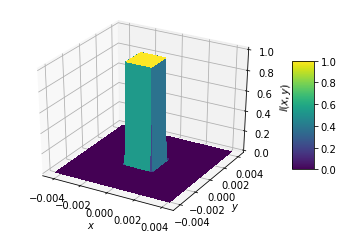

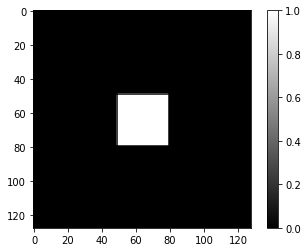

In [1425]:
alpha = z / z[n-1]

delta = (1 - alpha) * delta1 + alpha * deltan

m = delta[1:] / delta[0:-1]

x1 = nx * delta[0]
y1 = ny * delta[0]

r1sq = x1**2 + y1**2


print(delta_z)
print(delta)
print(m)

print('delta,delta_z,m')
print(delta[0],delta_z[0],m[0])

Q1 =  np.exp(1j * k/2 * (1-m[0])/delta_z[0] * r1sq)

Uin = Uin * Q1

gen_3d_contour(x1, y1, np.abs(Uin)**2)

plt.figure()
plt.imshow(np.abs(Uin)**2,cmap='gray')
plt.colorbar()

delta,delta_z,m
6.666666666666667e-05 0.25 1.4000000000000001
delta,delta_z,m
9.333333333333334e-05 0.25 1.2857142857142858
delta,delta_z,m
0.00012000000000000002 0.25 1.222222222222222
delta,delta_z,m
0.00014666666666666666 0.25 1.1818181818181819


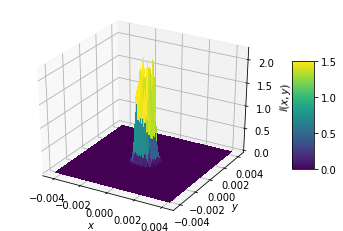

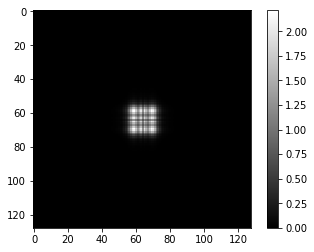

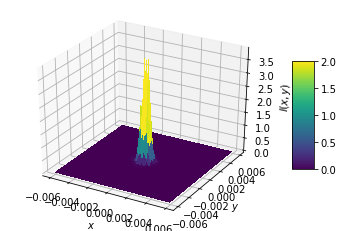

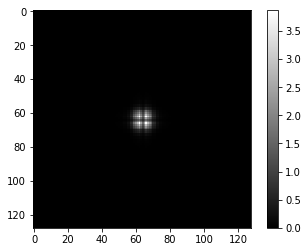

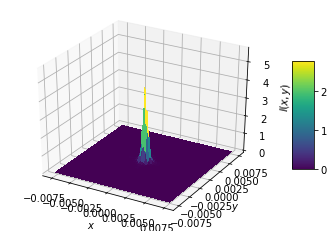

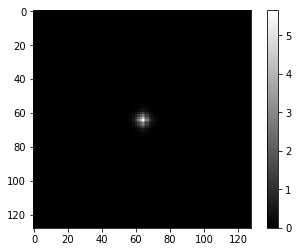

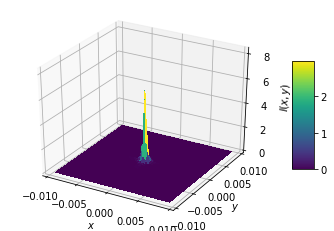

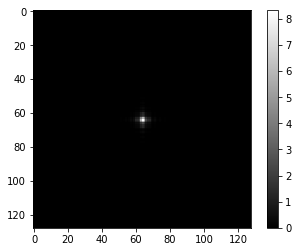

In [1426]:
for idx in range(0,n-2):
    
    xi = nx * delta[idx]
    yi = ny * delta[idx]
    
    deltaf = 1 / (N * delta[idx])
    
    fX = nx * deltaf
    fY = ny * deltaf

    fsq = fX**2 + fY**2

    Z = Delta_z[idx]
    mag = m[idx]
    
    print('delta,delta_z,m')
    print(delta[idx],Z,mag)
    
    Q2 = np.exp(-1j * np.pi**2 * 2 * Z/mag/k*fsq)
   
    Uin = ft2(Uin / mag, delta[idx])    
    Uin = ift2(Q2 * Uin, deltaf) 
       
    Uin = sg * Uin
    
    gen_3d_contour(xi, yi, np.abs(Uin)**2)
    
    plt.figure()
    plt.imshow(np.abs(Uin)**2,cmap='gray')
    plt.colorbar()

delta_z,m,delta
0.25 1.153846153846154 0.0002


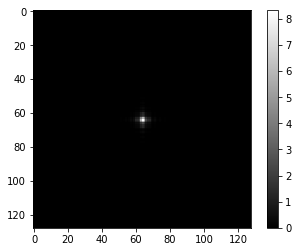

In [1427]:
xn = nx * delta[-1]
yn = ny * delta[-1]

print('delta_z,m,delta')
print(Z,m[-1],delta[-1])

rnsq = xn**2 + yn**2

Q3 = np.exp(1j * k/2. * (m[-1]-1)/(m[-1]*Z) * rnsq)

Uout = Q3 * Uin

I = np.abs(Uout)**2

plt.figure()
plt.imshow(I,cmap='gray')
plt.colorbar()

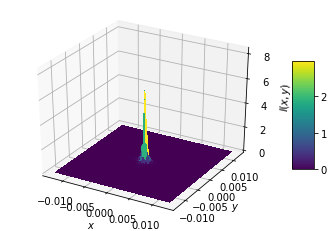

In [1428]:
gen_3d_contour(xn, yn, I)

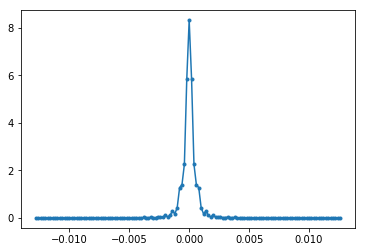

In [1429]:
rows,cols = I.shape

mid_row = rows / 2

I_slice = I[int(mid_row)]
xn_slice = xn[int(mid_row)]

plt.figure()
plt.plot(xn_slice,I_slice, '.-')